In [6]:
import pandas as pd
pd.set_option('display.max_rows',500)
import numpy as np
from datetime import datetime
import subprocess;import os

## Github Csv Data

In [7]:

git_pull = subprocess.Popen( ['git','pull'] ,
                         cwd = os.path.dirname( '../data/raw/COVID-19/' ),
                         shell = True,
                         stdout = subprocess.PIPE,
                         stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error))
print("out : " + str(out))



Error : b'From https://github.com/CSSEGISandData/COVID-19\n   4c8006b0..ab1ca597  master     -> origin/master\n   5a4a5db4..7e1c3846  web-data   -> origin/web-data\n'
out : b'Updating 4c8006b0..ab1ca597\nFast-forward\n csse_covid_19_data/README.md                       |    2 +\n .../csse_covid_19_daily_reports/09-12-2020.csv     | 3955 ++++++++++++\n .../csse_covid_19_daily_reports_us/09-12-2020.csv  |   59 +\n .../time_series_covid19_confirmed_US.csv           | 6682 ++++++++++----------\n .../time_series_covid19_confirmed_global.csv       |  534 +-\n .../time_series_covid19_deaths_US.csv              | 6682 ++++++++++----------\n .../time_series_covid19_deaths_global.csv          |  534 +-\n .../time_series_covid19_recovered_global.csv       |  508 +-\n 8 files changed, 11486 insertions(+), 7470 deletions(-)\n create mode 100644 csse_covid_19_data/csse_covid_19_daily_reports/09-12-2020.csv\n create mode 100644 csse_covid_19_data/csse_covid_19_daily_reports_us/09-12-2020.csv\n'


In [8]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
jh_raw=pd.read_csv(data_path)

In [4]:
time_idx=jh_raw.columns[4:]
print(time_idx)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20',
       '9/9/20', '9/10/20', '9/11/20'],
      dtype='object', length=234)


In [5]:
df_plot=pd.DataFrame({'date':time_idx})

In [6]:
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [9]:
jh_raw[jh_raw['Country/Region']=='Germany'].iloc[:,4::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20
130,0,0,0,0,0,1,4,4,4,5,...,247411,248840,250283,251058,251728,253626,254957,256433,258149,259735


In [13]:
country_list=['India','Italy','US','Germany']
for each in country_list:
    df_plot[each]=np.array(jh_raw[jh_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

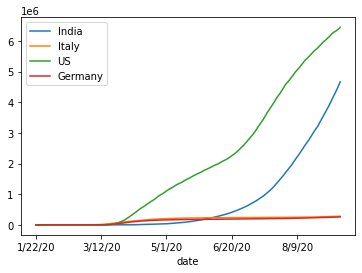

In [16]:
df_plot.set_index('date').plot()


In [19]:
datetime.strptime(df_plot.date[0],'%m/%d/%y') #converting into datetime format.

datetime.datetime(2020, 1, 22, 0, 0)

In [20]:
#converting into ISO datetime format.
time_idx=[datetime.strptime(each,'%m/%d/%y') for each in df_plot.date] 
time_str=[each.strftime("%Y-%m-%d") for each in time_idx] #ISO format.

In [21]:
time_str[:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [22]:
df_plot['date']=time_str

In [23]:
df_plot.head()

,date,India,Italy,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0


In [24]:
df_plot.to_csv(r'../data/processed/COVID_small_flat_table.csv',sep=';')

## Relation Data model

In [9]:
jh_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [10]:
jh_data_bs=jh_raw.rename(columns={'Country/Region':'country','Province/State': 'state'}) # rename the country and state for comfort.


In [11]:
jh_data_bs=jh_data_bs.drop(columns=["Lat","Long"]) # dropping latitude and longitude columns
jh_data_bs.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641
1,NaN,Albania,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335


In [13]:
jh_test_data=jh_data_bs.set_index(['state','country']).T

In [37]:
jh_rel_data=jh_test_data.stack(level=(0,1)).reset_index().rename(columns={'level_0':'date',0:'confirmed_cases'})

In [38]:
jh_rel_data.head()

,date,state,country,confirmed_cases
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [39]:
jh_rel_data['date']=jh_rel_data.date.astype('datetime64[ns]')

In [41]:

jh_rel_data.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

## Group by apply

In [15]:
jh_jb_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
jh_jb_data=jh_jb_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
jh_jb_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,"Korea, South",1.0
2,2020-01-22,no,Kosovo,0.0
3,2020-01-22,no,Kuwait,0.0
4,2020-01-22,no,Kyrgyzstan,0.0


In [17]:
test_data=jh_jb_data[((jh_jb_data['country']=='India')|(jh_jb_data['country']=='Germany'))&(jh_jb_data['date']>'2020-03-20')]

In [18]:
test_data

,date,state,country,confirmed
15736,2020-03-21,no,Germany,22213.0
15749,2020-03-21,no,India,330.0
16003,2020-03-22,no,Germany,24873.0
16016,2020-03-22,no,India,396.0
16269,2020-03-23,no,Germany,29056.0
16281,2020-03-23,no,India,499.0
16535,2020-03-24,no,Germany,32986.0
16547,2020-03-24,no,India,536.0
16801,2020-03-25,no,Germany,37323.0
16814,2020-03-25,no,India,657.0


In [20]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-09-12,no,260817.0
India,2020-09-12,no,4754356.0


In [27]:
# %load ../src/features/build_features.py
"""
Created on Mon Sep 14 01:14:41 2020

@author: Rahul Jakkamsetty
"""

import numpy as np
from sklearn import linear_model #importing a linear model from scikit library
reg = linear_model.LinearRegression(fit_intercept=True) # To make the linear fit to pass through the origin of the original data.
import pandas as pd

from scipy import signal # for savgol filter.


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope


    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'


    pd_DR_result= df_input.groupby(['state','country']).apply(rolling_reg,filter_on).reset_index()

    pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
                             'level_2':'index'})

    #we do the merge on the index of our big table and on the index column after groupby
    df_output=pd.merge(df_input,pd_DR_result[['index',str(filter_on+'_DR')]],left_index=True,right_on=['index'],how='left')
    df_output=df_output.drop(columns=['index'])


    return df_output




In [ ]:
test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [36]:
def rolling_reg(df_input,col='confirmed'):
    days_back=3
    res=df_input[col].rolling(window=days_back,min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return res

In [37]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  15736            NaN
                16003            NaN
                16269       7.417994
                16535       7.142035
                16801       8.012983
                17066       6.954407
                17333       6.501919
                17598       7.390371
                17865      10.136671
                18131      13.541893
                18397      13.781393
                18663      13.140681
                18929      12.037271
                19195      12.735506
                19460      16.052694
                19727      21.372453
                19993      27.427355
                20259      27.511936
                20525      21.792179
                20791      21.495848
                21057      26.565108
                21323      36.198404
                21588      43.982990
                21855      49.423444
                22121      74.043747
                22386      56.424411
                

In [39]:




from scipy import signal # for savgol filter.



def savgol_filter(df_input,column='confirmed',window=5):


    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[str(column+'_filtered')]=result
    return df_result # has both input and output.



In [41]:
jh_filtered=jh_jb_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [42]:
jh_filtered

,index,state,country,confirmed,confirmed_filtered
0,0,Alberta,Canada,0.0,0.0
1,1,no,"Korea, South",1.0,0.8
2,2,no,Kosovo,0.0,0.0
3,3,no,Kuwait,0.0,0.0
4,4,no,Kyrgyzstan,0.0,0.0
...,...,...,...,...,...
62505,62505,no,Barbados,180.0,180.0
62506,62506,no,Belarus,73975.0,73975.2
62507,62507,no,Belgium,92478.0,92387.0
62508,62508,no,Albania,11185.0,11180.8
